<a href="https://colab.research.google.com/github/srineeey/vienna_maze/blob/master/01_Generative_Models_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Generative Models

### Basic Setup

For using GPU: click on "Edit" > "Notebook settings" > "Hardware accelerator" > "GPU".

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import pandas

import sklearn
import sklearn.metrics as metrics
import scipy.stats as stats

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [4]:
# Make sure we have a GPU allocated
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
print(device) # The output should be 'cuda'

cuda


In [5]:
# Get the dataset
# (fashion mnist training sample)
fashion_mnist = torchvision.datasets.FashionMNIST(".", 
                                                  train=True,
                                                  download=True)

X = fashion_mnist.data
X = X/256. # So values are between zero and one
y = fashion_mnist.targets
class_names = fashion_mnist.classes

print("Shape of data:", X.shape)
print("Shape of labels:", y.shape)
print("Items in dataset:", class_names)

Shape of data: torch.Size([60000, 28, 28])
Shape of labels: torch.Size([60000])
Items in dataset: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Here come 10 images of clothig items
Ankle boot


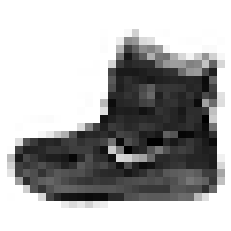

T-shirt/top


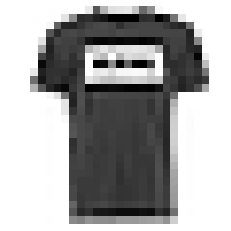

T-shirt/top


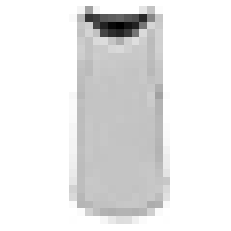

Dress


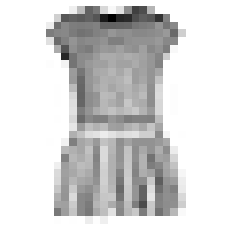

T-shirt/top


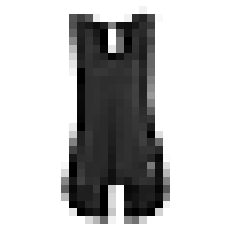

Pullover


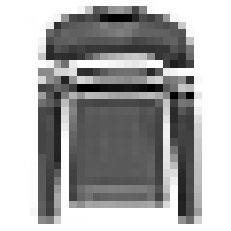

Sneaker


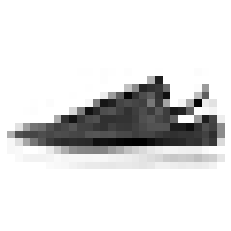

Pullover


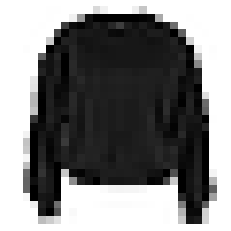

Sandal


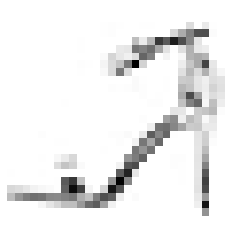

Sandal


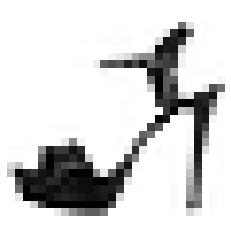

In [6]:
# Display the first 10 images
print("Here come 10 images of clothig items")
for i in range(10):
    plt.axis('off')

    image = X[i]
    label = y[i]
    
    print(class_names[label])
    
    plt.imshow(image,cmap='Greys',interpolation='none')
    plt.show()

# Exercises

In [0]:
# A few useful functions

# Define here the output size of your image. For this dataset, 28x28
n_pix = 28

# Produce random numbers as input for generator
# torch.randn produces random numbers following 
# a Gaussian with mean=0 and sigma=1
def noise(size):
    return torch.autograd.Variable(torch.randn(size, 100))

# Translate images to flat vectors (784 = 28*28)
def images_to_vectors(images):
    return images.view(images.size(0), n_pix*n_pix)

# Translate flat vectors to images in the format (color, vertical, horizontal)
def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), n_pix, n_pix)
  
# Helper function to draw MNIST image
# expect a 2D tensor as input
def draw_image(im):
    plt.imshow(im, cmap='Greys', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.show()  
  

### Exercise 1
   * Find out how many examples of each class are in the data
   * Plot images of 10 Sandals
  


In [8]:
import pandas as pd
y_np = y.cpu().numpy()
print(y_np.shape)

np.histogram(y_np)

(60000,)


(array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

torch.Size([6000])
tensor(8)


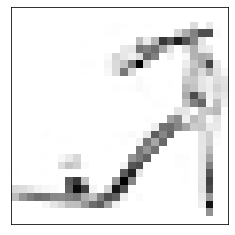

tensor(9)


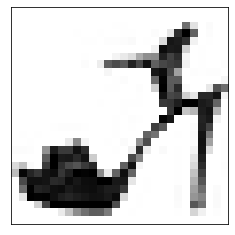

tensor(12)


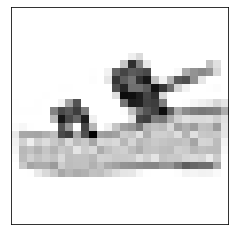

tensor(13)


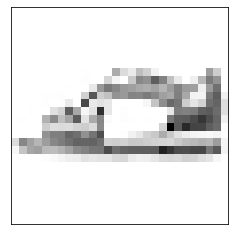

tensor(30)


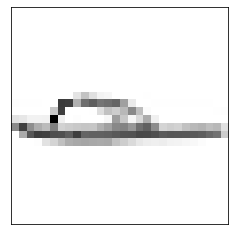

tensor(36)


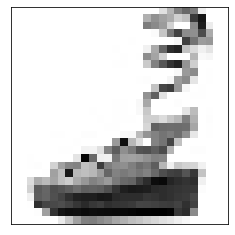

tensor(43)


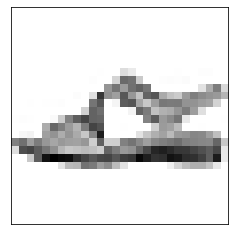

tensor(60)


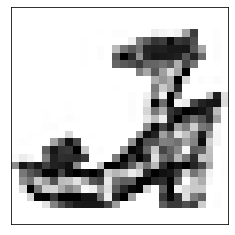

tensor(62)


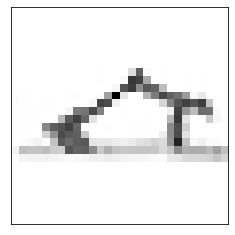

tensor(63)


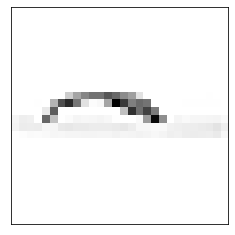

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [9]:
#print(X.shape)
#print(y.shape)
#class_names[y[i]]
sandal_index = 5
sandal_indices = np.argwhere(y == sandal_index)[0]
print(sandal_indices.shape)
for sandal_index in sandal_indices[0:10]:
  print(sandal_index)
  #print(X[sandal_index,:,:].shape)
  draw_image(X[sandal_index])

print(X[sandal_index])

### Exercise 2

* Implement the generator and discriminator networks and use them to train a generative model for Fashion-MNIST. The code below almost works, but you will need to add the layers (marked with #TODO)

### Exercise 3

  * The code for the VAE is fully functional but will not do a very good job. Run the VAE and observe the results it produced
    
  * Fix the following two issues: a) The loss function is missing the KL-Divergence term that ensures the latent space distribution to be Gaussian with the correct parameters. b) The network architecture is seriously underpowered. More comments in the code below Then retrain the VAE
  
  * Plot the distribution of the latent space variables after training. Are they Gaussian?

### Exercise 4

  * Comparing the results from GAN and VAE, what do you observe?


### GAN Networks

In [0]:
class DiscriminatorNet(torch.nn.Module):

  def __init__(self):
        super(DiscriminatorNet, self).__init__()

        self.main = nn.Sequential(
            
            # This is technically working but it's sub-optimal
            # TODO: add more layers
            # remember to avoid overfitting
            nn.Conv2d(1, 4, 3, 1, 0,bias=False),
            nn.ReLU(),
            nn.Conv2d(4, 8, 3, 1, 0,bias=False),
            nn.ReLU(),
            #nn.Dropout2d(p=0.2),
            nn.Conv2d(8, 16, 5, 1, 0,bias=False),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, 1, 0,bias=False),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.Linear(4*4*32, 4*2*32),
            nn.ReLU(),
            nn.Linear(4*2*32, 1),
            nn.Sigmoid(),
        )

  def forward(self, x):

        # Add a color layer - important if we want to use Conv2D
        x = x.view(-1,1,n_pix,n_pix)
     
        output = self.main(x)
       
        return output

    
class GeneratorNet(torch.nn.Module):
    """
    The generative neural network. 
    """
        
    def __init__(self):
        super(GeneratorNet, self).__init__()
        
        self.main = nn.Sequential(
            # This is technically working but it's sub-optimal
            # TODO: add more layers
            # remember to avoid overfitting
            nn.ConvTranspose2d(100, 50, 4, 1, 0, bias=False),      
            nn.Sigmoid(),  
            nn.ConvTranspose2d(50, 50, 4, 1, 0, bias=False),      
            nn.Tanh(),
            #nn.Dropout(),
            nn.ConvTranspose2d(50, 25, 5, 1, 0, bias=False),     
            nn.Sigmoid(),  
            nn.ConvTranspose2d(25, 25, 5, 1, 0, bias=False),      
            nn.Tanh(),  
            nn.ConvTranspose2d(25, 5, 7, 1, 0, bias=False),      
            nn.Sigmoid(),  
            nn.ConvTranspose2d(5, 1, 8, 1, 0, bias=False),      
            nn.Sigmoid(),      
        )
           
    
    def forward(self, x):
        # forward pass of the network
        
        # Reshape input tensor to (batch size, 100, 1, 1)
        x = x.view(-1,100,1,1)
        # Apply the network
        x = self.main(x)
        # Reshape to image
        #print(x.shape)
        x = x.view(-1,n_pix*n_pix)
    
        return x
      
      
discriminator = DiscriminatorNet().to(device)
generator = GeneratorNet().to(device)

d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001,betas=(0.5,0.999))
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002,betas=(0.5,0.999))

loss = nn.BCELoss() # Binary cross entropy loss function

### GAN Training

Epoch: 0, Batch: 0, Error D: 1.3870689868927002, Error G: 0.7149374485015869


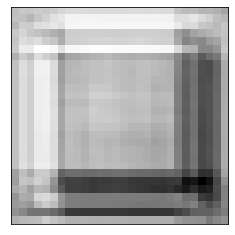

Epoch: 0, Batch: 500, Error D: 0.597938060760498, Error G: 1.405514121055603


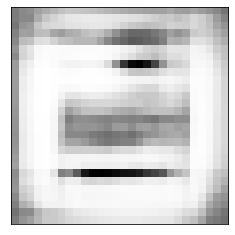

Epoch: 0, Batch: 1000, Error D: 0.42907893657684326, Error G: 1.7228924036026


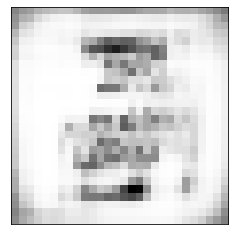

Epoch: 1, Batch: 0, Error D: 0.32272061705589294, Error G: 1.9073454141616821


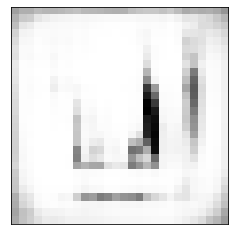

Epoch: 1, Batch: 500, Error D: 0.14630109071731567, Error G: 2.2306149005889893


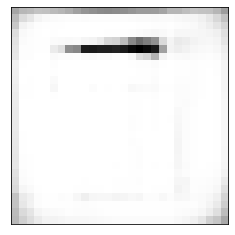

Epoch: 1, Batch: 1000, Error D: 1.432483434677124, Error G: 2.0822720527648926


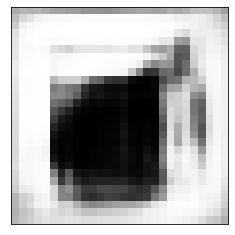

Epoch: 2, Batch: 0, Error D: 0.3835275173187256, Error G: 1.9504565000534058


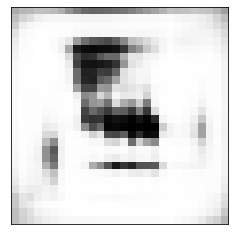

Epoch: 2, Batch: 500, Error D: 0.6517075300216675, Error G: 1.8201864957809448


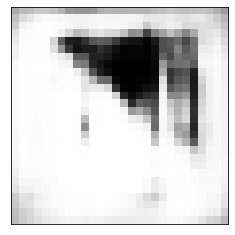

Epoch: 2, Batch: 1000, Error D: 0.24690310657024384, Error G: 1.8239200115203857


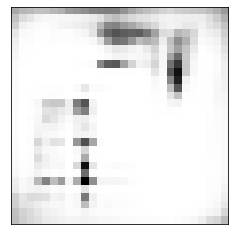

Epoch: 3, Batch: 0, Error D: 0.19644536077976227, Error G: 3.616658926010132


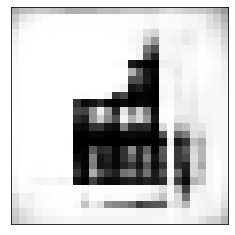

Epoch: 3, Batch: 500, Error D: 0.3106576204299927, Error G: 2.253514289855957


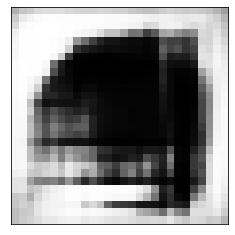

Epoch: 3, Batch: 1000, Error D: 0.14422962069511414, Error G: 2.923083782196045


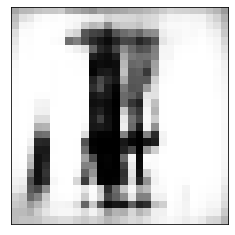

Epoch: 4, Batch: 0, Error D: 0.0460502952337265, Error G: 5.664085865020752


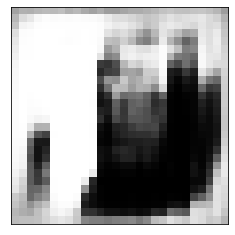

Epoch: 4, Batch: 500, Error D: 0.2929811179637909, Error G: 2.795659065246582


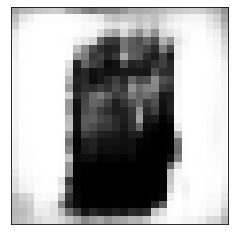

Epoch: 4, Batch: 1000, Error D: 0.17308059334754944, Error G: 3.4063074588775635


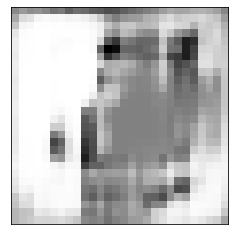

Epoch: 5, Batch: 0, Error D: 0.056659337133169174, Error G: 3.1519742012023926


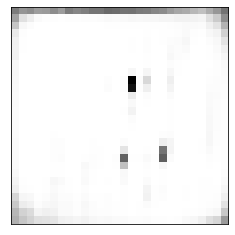

Epoch: 5, Batch: 500, Error D: 0.25579139590263367, Error G: 3.7941079139709473


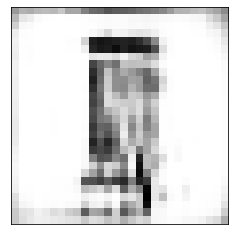

Epoch: 5, Batch: 1000, Error D: 0.03468271717429161, Error G: 3.834886074066162


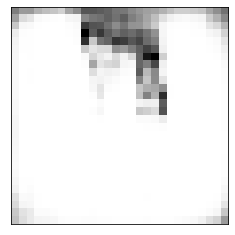

Epoch: 6, Batch: 0, Error D: 0.1319694221019745, Error G: 3.3868401050567627


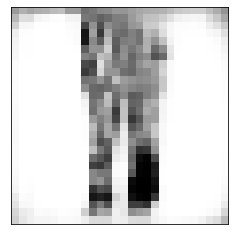

Epoch: 6, Batch: 500, Error D: 0.1457671821117401, Error G: 3.2428882122039795


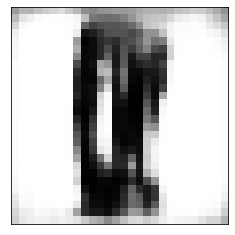

Epoch: 6, Batch: 1000, Error D: 0.19451740384101868, Error G: 4.039983749389648


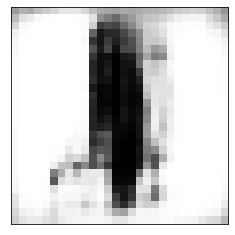

Epoch: 7, Batch: 0, Error D: 0.2578084468841553, Error G: 2.7273504734039307


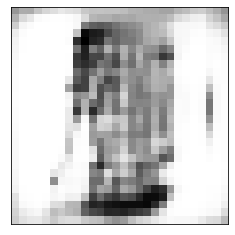

Epoch: 7, Batch: 500, Error D: 0.13725152611732483, Error G: 3.1154797077178955


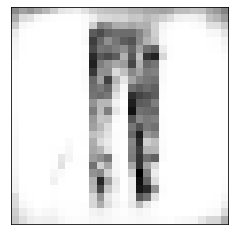

Epoch: 7, Batch: 1000, Error D: 0.011430283077061176, Error G: 5.210101127624512


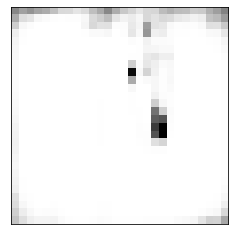

Epoch: 8, Batch: 0, Error D: 0.18536436557769775, Error G: 9.602057456970215


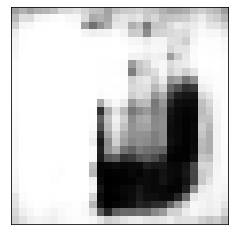

Epoch: 8, Batch: 500, Error D: 0.1391928642988205, Error G: 4.1341962814331055


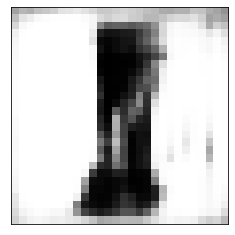

Epoch: 8, Batch: 1000, Error D: 0.15918272733688354, Error G: 3.957138776779175


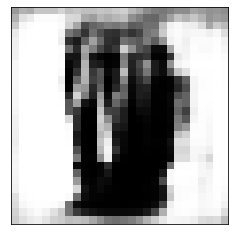

Epoch: 9, Batch: 0, Error D: 0.03629973530769348, Error G: 6.927427768707275


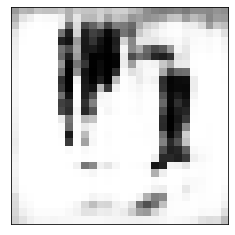

Epoch: 9, Batch: 500, Error D: 0.1162184625864029, Error G: 4.491998672485352


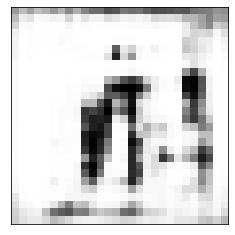

Epoch: 9, Batch: 1000, Error D: 0.3693790137767792, Error G: 3.3844830989837646


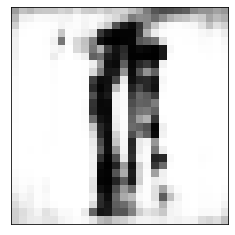

Epoch: 10, Batch: 0, Error D: 0.030896080657839775, Error G: 5.817506313323975


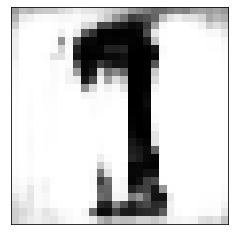

KeyboardInterrupt: ignored

In [11]:
# The code below handles the training and evaluation of the GAN

batch_size = 50

max_batches = int(X.shape[0] / batch_size)

# Total number of epochs to train
n_epochs = 200 # start with one epoch (you will want to increase this number)

# Loop over epochs
for epoch in range(n_epochs):
    
    # Loop over training examples
    for i_batch in range(max_batches):

      
        real_batch = X[i_batch*batch_size:(i_batch+1)*batch_size].cuda()
      
        # Batch size
        N = real_batch.size(0)
        
        # First Train Discriminator
        real_data = torch.autograd.Variable(images_to_vectors(real_batch))
        
        # Generate fake data
        fake_data = generator(noise(N).cuda())
        #print(fake_data.shape)

        # Reset gradient
        d_optimizer.zero_grad()
    
        # Train discriminator on real data
        prediction_real = discriminator(real_data)

        # Calculate error and backpropagate
        # We want the discriminator to report "1" for real images
        ones = torch.autograd.Variable(torch.ones(N, 1)).cuda()
        error_real = loss(prediction_real, ones)
        error_real.backward()

        # Train discriminator on fake data
        prediction_fake = discriminator(fake_data.detach())
        
        # Calculate error and backpropagate
        # We want the discriminator to report "0" for fake images
        zeros =  torch.autograd.Variable(torch.zeros(N, 1)).cuda()
        error_fake = loss(prediction_fake, zeros)
        error_fake.backward()

        # Total discriminator error
        d_error =  error_real + error_fake

        # Update weights with gradients
        d_optimizer.step()
        
        # Train Generator
        # Generate fake data
        fake_data = generator(noise(N).cuda())

        # Reset gradients
        g_optimizer.zero_grad()

        # Sample noise and generate fake data
        prediction = discriminator(fake_data)

        # Calculate error and backpropagate
        # instead of maximising the loss for zeros we minimise the loss for ones
        ones = torch.autograd.Variable(torch.ones(N, 1)).cuda()
        g_error = loss(prediction, ones)
        g_error.backward()

        
        # Update weights with gradients
        g_optimizer.step()

        # Show status every few batches
        if (i_batch) % 500 == 0: 
                        
            test_images = vectors_to_images(generator(noise(1).cuda()).cpu())
            test_images = test_images.data
            print("Epoch: {0}, Batch: {1}, Error D: {2}, Error G: {3}".format(epoch,i_batch,d_error,g_error))
            draw_image(test_images[0])

### VAE Networks

In [0]:
# The code below implements a (technically) fully functional variational autoencoder
# You will need to make it more complex, however

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Layers for the encoder
        self.fc1 = nn.Linear(n_pix*n_pix, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)

        self.sigma_fc1 = nn.Linear(64, 32)
        self.sigma_fc2 = nn.Linear(32, 20)

        self.mu_fc1 = nn.Linear(64, 32)
        self.mu_fc2 = nn.Linear(32, 20)

        
        # Layers for the decoder
        self.dec_fc1 = nn.Linear(20,32)
        self.dec_fc2 = nn.Linear(32,64)
        self.dec_fc3 = nn.Linear(64,64)
        self.dec_fc4 = nn.Linear(64,64)
        self.dec_fc5 = nn.Linear(64,n_pix*n_pix)

        
    def encode(self,x):
        # Encoder part of the network
        # TODO:
        # We have one layer to calculate mu and one to calculate sigma
        # Ideally we would have a few shared layers for mu and sigma 
        # and the final layers separate. Of course the intermediate
        # layers should also include activiation functions
        act_func = nn.Tanh()
        x = self.fc1(x)
        x = act_func(x)
        x = self.fc2(x)
        x = act_func(x)
        x = self.fc3(x)
        x = act_func(x)

        mu = self.mu_fc1(x)
        mu = act_func(mu)
        mu = self.mu_fc2(mu)

        sigma = self.sigma_fc1(x)
        sigma = act_func(sigma)
        sigma = self.sigma_fc2(sigma)
            
        return mu,sigma
    
    def decode(self, z):
        # Decoder part of the network
        # TODO:
        # This could also be more complex. Make sure to keep the sigmoid
        # as final actication
        act_func = nn.Tanh()
        z = self.dec_fc1(z)
        z = act_func(z)
        z = self.dec_fc2(z)
        z = act_func(z)
        z = self.dec_fc3(z)
        z = act_func(z)
        z = self.dec_fc4(z)
        z = act_func(z)
        z = self.dec_fc5(z)
        z = act_func(z)

        return z
        
    def sample(self, mu, sigma):

        # randn_like produces random numbers using a Gauss(0,1) distribution
        # as a tensor with the same shape as its argument
        eps = torch.randn_like(sigma)
        z = mu + eps*sigma
        
        return z
   

    def forward(self, x):
        
        x = x.view(-1,n_pix*n_pix)
        
        mu,sigma = self.encode(x)
        
        z = self.sample(mu,sigma)
                
        out = self.decode(z)

        return out, mu, sigma


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')          
model = VAE().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## KLD formula:

$\frac{1}{2} \sum_{j=1}^J \left( 1 + log((\sigma_j)^2) - (\mu_j)^2 - (\sigma_j)^2 \right)$

In [0]:
# Reconstruction loss function
def loss_function(recon_x, x, mu, sigma):

    # Binary cross entropy
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, n_pix*n_pix), reduction='sum')
    
    # TODO:
    # Here we are missing the Kullback-Leiber divergence
    # You should calculate it following the formula from the lecture
    # For a tensor T you can call T.pow(2) to square it
    # and T.log() to calculate the logarithm
    # torch.sum(T) sums over the different axes of a tensor and return a scalar

    KLD = 0.5 * np.sum(1. + 2*np.log(sigma) - mu**2 - sigma**2)
      
    return BCE + KLD

In [18]:
# The code below handles the training of the VAE

batch_size = 50

max_batches = int(X.shape[0] / batch_size)

# Total number of epochs to train
n_epochs = 1 # start with one epoch (you will want to increase this number)

# Loop over epochs
for epoch in range(n_epochs):

    train_loss = 0
  
    # Loop over training examples
    for i_batch in range(max_batches):
    

 
        # Prepare input data
        data = X[i_batch*batch_size:(i_batch+1)*batch_size].cuda()
               
        # reset readients
        optimizer.zero_grad()
                
        # apply model to data and get the decoder output as well as the
        # latent space variables
        recon_batch, mu, sigma = model(data)
        
        # calculate the loss function and update gradients
        loss = loss_function(recon_batch, data, mu, sigma)
        loss.backward() 
        optimizer.step()
        
        train_loss += loss.item()
        
        # Show status every few batches
        if (i_batch) % 500 == 0: 
        
            # throw random numbers and let the autoencoder build images
            sample = torch.randn(20).to(device)
            sample = model.decode(sample).cpu()
    
            print("Epoch: {0}, Batch: {1}, Loss: {2}".format(epoch,i_batch,train_loss))
            draw_image(sample.view(1, n_pix, n_pix).detach().numpy()[0])

RuntimeError: ignored